In [1]:
import os
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import myServices as ms
import models as md
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve, auc, roc_auc_score, f1_score
import joblib

In [ ]:
# to compute ececution time do: 
# with timeit():
#     # your code, e.g., 
class timeit(): 
    from datetime import datetime
    def __enter__(self):
        self.tic = self.datetime.now()
    def __exit__(self, *args, **kwargs):
        print('runtime: {}'.format(self.datetime.now() - self.tic))

## Importing and manipulating datasets

In [ ]:
sklearn.metrics.get_scorer_names()

In [2]:
### Cleaning basin1DataSet 
basin1Light = pd.read_csv('basin1Light_Clean.csv', index_col = None)
# basin1Light = pd.read_csv('datasetBasin1_NoDataFree.csv', index_col = None)
print(basin1Light.info())
basin1Light.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134268 entries, 0 to 2134267
Data columns (total 14 columns):
 #   Column      Dtype  
---  ------      -----  
 0   percentage  int64  
 1   TWI         float64
 2   TPI         float64
 3   FAcc        float64
 4   slope       float64
 5   elevation   float64
 6   x_coord     int64  
 7   y_coord     int64  
 8   DLSOL4R150  float64
 9   DLSOL5R150  float64
 10  DLSOL5R200  float64
 11  FAProx_01   float64
 12  FAProx_025  float64
 13  visibility  float64
dtypes: float64(11), int64(3)
memory usage: 228.0 MB
None


,percentage,TWI,TPI,FAcc,slope,elevation,x_coord,y_coord,DLSOL4R150,DLSOL5R150,DLSOL5R200,FAProx_01,FAProx_025,visibility
count,2.134268e+06,2.134268e+06,2.134268e+06,2.134268e+06,2.134268e+06,2.134268e+06,2.134268e+06,2.134268e+06,2.134268e+06,2.134268e+06,2.134268e+06,2.134268e+06,2.134268e+06,2.134268e+06
mean,1.069041e-01,9.498964e+00,-4.539183e-04,8.007268e-04,4.741202e+00,1.397329e+02,3.650266e+05,5.264290e+06,1.044776e-03,2.254555e-03,2.256526e-03,6.722759e+01,1.744695e+02,7.398875e-02
std,7.114130e-01,4.106028e+00,1.970134e-01,1.769646e-02,5.027564e+00,4.454908e+01,3.131664e+03,1.759008e+03,1.957305e-03,2.784430e-03,2.364806e-03,5.539541e+01,1.873320e+02,6.815981e-02
min,0.000000e+00,-9.252120e+00,-4.857010e+00,0.000000e+00,4.700000e-04,-3.685000e-02,3.589130e+05,5.260383e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-05
25%,0.000000e+00,5.566240e+00,-6.273000e-02,9.678852e-07,1.535188e+00,1.115880e+02,3.623380e+05,5.262823e+06,0.000000e+00,0.000000e+00,0.000000e+00,2.404163e+01,0.000000e+00,2.217000e-02
50%,0.000000e+00,1.025559e+01,-2.600000e-04,4.083652e-06,3.069940e+00,1.428864e+02,3.650230e+05,5.264423e+06,0.000000e+00,6.200000e-04,1.810000e-03,5.374012e+01,1.096586e+02,5.424000e-02
75%,0.000000e+00,1.286854e+01,6.117000e-02,2.111712e-05,6.042707e+00,1.742564e+02,3.673980e+05,5.265748e+06,1.000000e-03,4.330000e-03,3.690000e-03,9.580188e+01,3.244226e+02,1.036100e-01
max,5.000000e+00,2.486353e+01,3.891020e+00,1.000000e+00,6.023912e+01,2.546740e+02,3.719280e+05,5.267893e+06,1.095000e-02,1.719000e-02,1.427000e-02,2.940017e+02,6.000000e+02,3.765600e-01


In [ ]:
basin1Light.isna().any()

In [ ]:
basin1Light['percentage'].unique()
Counter(basin1Light['percentage'])

In [ ]:
basin1Light.isna().sum()

In [ ]:
print(basin1Light['FAcc'].max())

In [ ]:
#### NOrmalize Flow Accumulation
basin1Light['FAcc'] = (basin1Light['FAcc']- basin1Light['FAcc'].min())/(basin1Light['FAcc'].max()-basin1Light['FAcc'].min())

In [ ]:
basin1Light['FAProx_025'] = [0 if basin1Light['FAProx_025'][i] == -9999 
                             else basin1Light['FAProx_025'][i] 
                             for i  in range(len(basin1Light['FAProx_025']))]

In [ ]:
basin1Light.describe()

In [ ]:
basin1Light.to_csv('basin1Light_Clean.csv', index=None)

In [37]:
### Making quadratic transformation in Labels for regression
DS = pd.read_csv('basin1Light_Clean.csv', index_col = None)
print(Counter(DS['percentage']))

# y_Quad = md.quadraticRechapeLabes(DS['percentage'], -0.125, 0.825)
# DS['percentage'] = y_Quad
# print(Counter(DS['percentage']))
# DS.to_csv('basin1TrainUnbalanced_QuadTarget.csv', index = None)

Counter({0: 2081386, 5: 43820, 1: 9062})


In [39]:
ds = DS.head(5)
s = {}
s['Datas'] = ds
print(s)

{'Datas':    percentage       TWI      TPI      FAcc     slope  elevation  x_coord  \
0           0  12.88506 -0.04411  0.000006   8.52348   48.30993   370378   
1           0  12.74378 -0.08968  0.000005  10.78189   48.82024   370373   
2           0  12.86957 -0.03528  0.000006   8.48582   48.04361   370378   
3           0  12.86129  0.10560  0.000006   8.44216   47.46280   370383   
4           0   3.35582 -0.09266  0.000004  14.52239   49.66032   370368   

   y_coord  DLSOL4R150  DLSOL5R150  DLSOL5R200  FAProx_01  FAProx_025  \
0  5267893         0.0         0.0         0.0   84.64632   423.23163   
1  5267888         0.0         0.0         0.0   84.50444   422.52222   
2  5267888         0.0         0.0         0.0   83.86894   419.34473   
3  5267888         0.0         0.0         0.0   83.24062   416.20306   
4  5267883         0.0         0.0         0.0   84.38602   421.93008   

   visibility  
0     0.01819  
1     0.01684  
2     0.01800  
3     0.02040  
4     0.01633 

## balanced sampling

In [ ]:
## Stratified Split
from sklearn.model_selection import StratifiedShuffleSplit

X,Y = ms.importDataSet('basin1Light_Clean.csv', 'percentage')
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)
for train_index, test_index in sss.split(X, Y):
    print("TRAIN:", train_index.size, "TEST:", test_index.size)
    X_train = X.iloc[train_index]
    y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = Y.iloc[test_index]

In [ ]:
#####. Creating training set
print(X_train.head())
X_train['percentage'] = y_train
print(X_train.head())
print(X_train.info())

In [ ]:
Counter(X_train['percentage'])

In [ ]:
X_train.drop(['x_coord','y_coord'], axis =1, inplace=True)
X_train.head()

In [ ]:

X_train.to_csv('basin1Light_Clean_Training.csv', index=None)

In [ ]:
#####. Creating training set
print(X_test.head())
X_test['percentage'] = y_test
print(X_test.head())
print(X_test.info())


In [ ]:
Counter(X_test['percentage'])

In [ ]:
X_test.to_csv('basin1Light_Clean_Test.csv', index=None)

In [ ]:
## This proportions are the reason why a sample_weight of 0.01 for the majority class give best results for regression
totalTrain = sum([1665108, 35056, 7250])
totalValidation = sum([416278,8764, 1812])
print("Summary of traning and test dataset class balance")
print(f"Training Set:", '\n', "Class 0: %.3f" %(1665108/totalTrain), " Class 1: %.4f" %(7250/totalTrain), "Class 5: %.4f"%(35056/totalTrain))
print("Testing Set:", '\n', "Class 0: %.3f" %(416278/totalValidation)," Class 1: %.4f" %(1812/totalValidation),  "Class 5: %.4f"%(8764/totalValidation))



In [ ]:
print(sum([416278,8764, 1812]))

In [ ]:
model = ms.loadModel('./outputs/2022-08-05/00-35-58/2208050035.pkl')
dataSetToSave = ms.makePredictionToImportAsSHP(csvName, model, X, Y, 'percentage')
print(dataSetToSave.head())

## Controled sampling

In [ ]:
DS = pd.read_csv('basin1Light_Clean_Training.csv', index_col = None)
print(DS.head())


In [ ]:
print(DS.columns)

In [ ]:
plt.boxplot(DS['FAcc']) # , , DS['elevation'], DS['disToRiv']]

In [ ]:
## Resampling appliying class selection by rule:

# RULE1: Select point at a distance to river less than 300m. 

# # newDS = pseudoClassCreation(DS, "distanceToRiver", 300, 2)
def pseudoClassCreation(dataset, conditionVariable, threshold, pseudoClass, targetClassName):
    '''
    Replace <targetClass> by  <pseudoClass> where <conditionVariable >= threshold>. 
    Return:
      dataset with new classes group. 
    '''
    datsetReclassified = dataset.copy()
    actualTarget = (np.array(dataset[targetClassName])).ravel()
    conditionVar = (np.array(dataset[conditionVariable])).ravel()
    datsetReclassified[targetClassName] = [ pseudoClass if conditionVar[j] >= threshold 
                                           else actualTarget[j]
                                           for j in range(len(actualTarget))]
    print(Counter(datsetReclassified[targetClassName]))
    return  datsetReclassified

def revertPseudoClassCreation(dataset, originalClass, pseudoClass, targetClassName):
    '''
    Restablich  <targetClass> with <originalClass> where <targetClassName == pseudoClass>. 
    Return:
      dataset with original classes group. 
    '''
    datsetReclassified = dataset.copy()
    actualTarget = (np.array(dataset[targetClassName])).ravel()
    datsetReclassified[targetClassName] = [ originalClass if actualTarget[j] == pseudoClass
                                           else actualTarget[j]
                                           for j in range(len(actualTarget))]
    print(Counter(datsetReclassified[targetClassName]))
    return  datsetReclassified


print(Counter(X_train['percentage']))
newDS = pseudoClassCreation(X_train, 'disToRiv', 200, 2, 'percentage')
y = newDS['percentage']
newDS.drop(['percentage'], axis=1, inplace = True)
x_res,y_res = ms.randomUndersampling(newDS, y, )
x_res['percentage'] = y_res
# newDatase = revertPseudoClassCreation(x_res, 0, 2, 'percentage')


In [ ]:
x_res.to_csv('basin1ControlClass0Sampling4Class_ToSHP.csv',index = None)

# Data description and visualization

In [35]:
#### import dataset to describe

DS= pd.read_csv('basin1Light_Clean_Training.csv', index_col=None)
DS.head()

,TWI,TPI,FAcc,slope,elevation,DLSOL4R150,DLSOL5R150,DLSOL5R200,FAProx_01,FAProx_025,visibility,percentage
0,10.58693,0.03369,2.326111e-07,1.84963,132.86208,0.0000,0.00000,0.00000,70.17834,350.89172,0.14484,0
1,15.58900,-0.46507,9.337768e-05,12.92790,149.62212,0.0000,0.00000,0.00000,128.65457,0.00000,0.01794,0
2,9.81174,-0.00002,8.556172e-04,0.01081,157.50583,0.0041,0.00687,0.00511,14.14214,70.71068,0.02141,0
3,4.95368,-0.00207,4.681277e-06,10.14120,92.06225,0.0000,0.00000,0.00000,146.11298,0.00000,0.04377,0
4,3.12636,0.07556,3.835162e-08,1.15742,158.74361,0.0000,0.00000,0.00000,91.28527,474.13080,0.17479,0


In [ ]:
### FAcc vs Labels
targets = DS['percentage']
FAcc = original['FAcc']
FAcc_norm = DS['FAcc_norm']
fig, axs = plt.subplots(1, 2, figsize=(13,4), sharey=True)
fig.text(-0.02, 0.5, 'labels', va='center', rotation='vertical')
fig.text(0.5, 1, 'Flow accumulation vs labels distribution', ha ='center')
axs[0].scatter(FAcc,targets)
# axs[0].set_title("Facc")
axs[0].set(xlabel='a) Flow Accumulation')
axs[1].scatter(FAcc_norm,targets)
# axs[1].set_title("FAcc_norm")
axs[1].set(xlabel='b) Flow Accumulation estandardized')
plt.rcParams['font.size'] = '20'
fig.tight_layout()


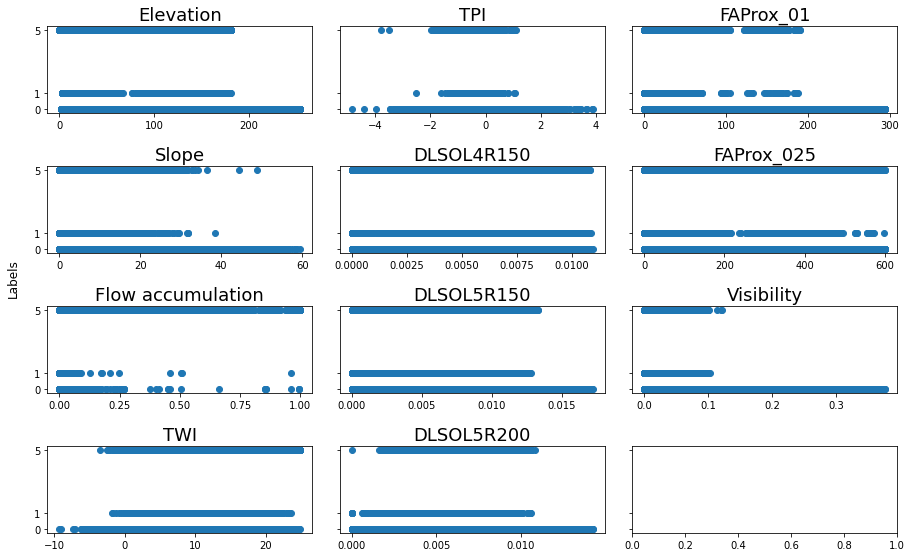

In [36]:

## Plot all features vs labels
# 'disToRiv', 'TWI', 'TPI', 'slope', 'elevation',

targets = DS['percentage']
# targets = np.where(targets == 5,2,targets)

E = DS['elevation'] 
slope = DS['slope']
FAcc = DS['FAcc']
TWI = DS['TWI']
TPI = DS['TPI']
DLSOL4R150 = DS['DLSOL4R150']
DLSOL5R150 = DS['DLSOL5R150']
DLSOL5R200 = DS['DLSOL5R200']
FAProx_01 = DS['FAProx_01']
FAProx_025 = DS['FAProx_025']
visibility = DS['visibility']

fig, axs = plt.subplots(4,3, figsize=(13, 8), sharey=True)
fig.supylabel('Labels')
plt.rcParams['font.size'] = '15'
plt.yticks([0,1,5])

'''
E = DS['elevation'] 
slope = DS['slope']
FAcc = DS['FAcc']
TWI = DS['TWI']
'''
axs[0, 0].scatter(E,targets)
axs[0, 0].set_title("Elevation")
axs[1, 0].scatter(slope,targets)
axs[1, 0].set_title("Slope")
axs[2, 0].scatter(FAcc,targets)
axs[2, 0].set_title("Flow accumulation")
axs[3, 0].scatter(TWI,targets)
axs[3, 0].set_title("TWI")

'''
TPI = DS['TPI']
DLSOL4R150 = DS['DLSOL4R150']
DLSOL5R150 = DS['DLSOL5R150']
DLSOL5R200 = DS['DLSOL5R200']
'''
axs[0, 1].scatter(TPI,targets)
axs[0, 1].set_title('TPI')
axs[1, 1].scatter(DLSOL4R150,targets)
axs[1, 1].set_title("DLSOL4R150")
axs[2, 1].scatter(DLSOL5R150,targets)
axs[2, 1].set_title("DLSOL5R150")
axs[3, 1].scatter(DLSOL5R200,targets)
axs[3, 1].set_title("DLSOL5R200")

'''
FAProx_01 = DS['FAProx_01']
FAProx_025 = DS['FAProx_025']
visibility = DS['visibility']
'''
axs[0, 2].scatter(FAProx_01,targets)
axs[0, 2].set_title('FAProx_01')
axs[1, 2].scatter(FAProx_025,targets)
axs[1, 2].set_title("FAProx_025")
axs[2, 2].scatter(visibility,targets)
axs[2, 2].set_title("Visibility")

fig.tight_layout()


In [ ]:
print(DS.head())
#  Return a dataset with the rows corresponding to the index where condition in DS.columName is valid. 
dsArray = DS[DS.percentage != 0] print(dsArray.head())
print(dsArray.head()) 

In [ ]:
sns.set(font_scale=1.5)
sns.pairplot(DS, hue = 'percentage', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 100},
             height = 4, corner=True, palette = "Set2")# vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'],

# sns.pairplot(DS, hue="percentage")

In [ ]:
####. Covariance Matrix
matrix = DS.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(criterion='entropy', random_state = 50)
x_train,y_train = ms.importDataSet('basin1Train.csv', 'percentage')
classifier = OneVsRestClassifier(estimator).fit(x_train,y_train)


In [ ]:
classifier = ms.loadModel('./outputs/2022-08-05/11-01-57/2208051101.pkl')
x_test,y_test = ms.importDataSet('basin1Test.csv', 'percentage')

x_test = ms.removeCoordinatesFromDataSet(x_test)

# y_prob = classifier.predict_proba(x_test)
#print(np.unique(y_prob))

In [ ]:
md.plot_ROC_AUC_OneVsRest(classifier, x_test, y_test)

In [ ]:
_,y_test = ms.importDataSet('./bestModels/Classifier/10-18-08/2208051018prediction_basin1Test.csv', 'prediction')
unique, count = np.unique(y_test, return_counts=True)
total = count.sum()
print(total)
percent = np.round(np.zeros_like(unique).astype('float16'),3)
print('values, counts , percent')
for i in range(len(unique)):    
   percent[i] = (count[i]/total)*100
   print(unique[i],"\t", count[i], percent[i])
